<a href="https://colab.research.google.com/github/iamviji/project/blob/master/PostMidTerm/misc/py_itpp_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!sudo apt-get install autoconf
!sudo apt-get install libtool
!sudo apt-get install liblapack-dev libblas-dev libfftw3-dev
!rm -rf itpp
!git clone https://github.com/iamviji/itpp.git # original one had compilation issue, did minor signle line change after forking
!ls;cd itpp;ls;mkdir -p build1 build2; cd build1 ; cmake cmake ..;make ;make install
!rm -rf py-itpp
!git clone https://github.com/iamviji/py-itpp.git
!pip3 install pybind11
!cd py-itpp;./install_prerequisites_python3.sh;make install;pip3 install -e .  
!cd py-itpp; ls ; pip3 install -e .  
!cat py-itpp/setup.py
import sys
!cp -rf py-itpp/lib/itpp py-itpp/lib/pyitpp # import itpp is not working, after this hack i started to work
sys.path.append('./py-itpp/lib')
#!pip install gwpy &> /dev/null

Reading package lists... Done
Building dependency tree       
Reading state information... Done
autoconf is already the newest version (2.69-11).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtool is already the newest version (2.4.6-2).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libblas-dev is already the newest version (3.7.1-4ubuntu1).
libfftw3-dev is already the newest version (3.3.7-1).
liblapack-dev is already the newest version (3.7.1-4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
Cloning into 'itpp'...
remote: Enumerating objects: 14431, done.
remote: Total 14431 (delta 0), reused 0 (delta 0), pack-reused 14431
Receiving objects: 100% (14431/14431), 4.88 MiB | 1.45 MiB/s, done.
Resolving deltas: 100% (12154/12154), done.

In [2]:
import itpp
from matplotlib import pyplot as plt

BLER for uncoded bits over AWGN channel
BLER for Hamming (7, 4) coded  bits over AWGN channel
snr= -10 variance= 3.1622776601683795
snr= -9 variance= 2.8183829312644537
snr= -8 variance= 2.51188643150958
snr= -7 variance= 2.23872113856834
snr= -6 variance= 1.9952623149688797
snr= -5 variance= 1.7782794100389228
snr= -4 variance= 1.5848931924611136
snr= -3 variance= 1.4125375446227544
snr= -2 variance= 1.258925411794167
snr= -1 variance= 1.1220184543019636
snr= 0 variance= 1.0
snr= 1 variance= 0.8912509381337456
snr= 2 variance= 0.7943282347242815
snr= 3 variance= 0.7079457843841379
snr= 4 variance= 0.6309573444801932
snr= 5 variance= 0.5623413251903491
snr= 6 variance= 0.5011872336272722
snr= 7 variance= 0.4466835921509631
snr= 8 variance= 0.3981071705534972
snr= 9 variance= 0.3548133892335754
BLER for Turbo coded  bits over AWGN channel, interleaver length 48 and code rate 0.33
snr: -10 noise_var: 10.0
snr: -9 noise_var: 7.943282347242815
snr: -8 noise_var: 6.3095734448019325
snr: -7 

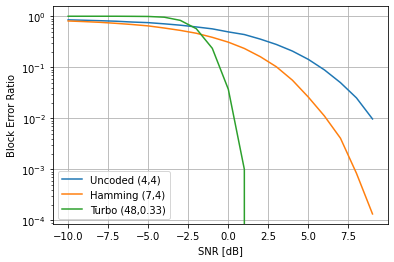

In [3]:
# MIT License
# 
# Copyright (c) 2018 Vidit Saxena
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
# 
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
# 
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

import itpp

import matplotlib
#matplotlib.use("tkagg")

from matplotlib import pyplot as plt

def block_error_ratio_uncoded_awgn(snr_db, block_size):
    '''Generate random bits'''
    nrof_bits = 3 * 10000 * block_size
    source_bits = itpp.random.randb(nrof_bits)
    
    '''Modulate the bits'''
    modulator_ = itpp.comm.modulator_1d()
    constellation = itpp.vec('-1, 1')
    symbols = itpp.ivec('0, 1')
    modulator_.set(constellation, symbols)
    tx_signal = modulator_.modulate_bits(source_bits)
    
    '''Add the effect of channel to the signal'''
    noise_variance = 1.0 / (pow(10, 0.1 * snr_db))
    noise = itpp.random.randn(tx_signal.length())
    noise *= itpp.math.sqrt(noise_variance)
    rx_signal = tx_signal + noise
    
    '''Demodulate the signal'''
    demodulated_bits = modulator_.demodulate_bits(rx_signal)
    
    '''Calculate the block error ratio'''
    blerc = itpp.comm.BLERC(block_size)
    blerc.count(source_bits, demodulated_bits)
    return blerc.get_errorrate()

def block_error_ratio_hamming_awgn(snr_db, block_size):
    '''Hamming encoder and decoder instance'''
    k = 3 # (7,4) Hamming code
    hamm = itpp.comm.Hamming_Code(k)
    
    '''Generate random bits'''
    nrof_bits = k * 10000 * block_size
    source_bits = itpp.random.randb(nrof_bits)
    
    '''Encode the bits'''
    encoded_bits = hamm.encode(source_bits)
    
    '''Modulate the bits'''
    modulator_ = itpp.comm.modulator_1d()
    constellation = itpp.vec('-1, 1')
    symbols = itpp.ivec('0, 1')
    modulator_.set(constellation, symbols)
    tx_signal = modulator_.modulate_bits(encoded_bits)
    
    '''Add the effect of channel to the signal'''
    noise_variance = 1.0 / (pow(10, 0.1 * snr_db))
    print ("snr=", snr_db, "variance=", itpp.math.sqrt(noise_variance))
    noise = itpp.random.randn(tx_signal.length())
    noise *= itpp.math.sqrt(noise_variance)
    rx_signal = tx_signal + noise
    
    '''Demodulate the signal'''
    demodulated_bits = modulator_.demodulate_bits(rx_signal)
    
    '''Decode the received bits'''
    decoded_bits = hamm.decode(demodulated_bits) 
    
    '''Calculate the block error ratio'''
    blerc = itpp.comm.BLERC(block_size)
    blerc.count(source_bits, decoded_bits)
    return blerc.get_errorrate()

def block_error_ratio_turbo_awgn(snr_db, interleaver_length):
  '''Create turbo_codec_instance'''
  codec = itpp.comm.turbo_codec()
  
  '''Set codec parameters'''
  gen = itpp.ivec(2)
  gen[0] = 11
  gen[1] = 13
  constraint_length = 4
  interleaver = itpp.ivec('0, 19, 14, 33, 28, 47, 42, 13, 8, 27, 22, 41, 36, 7, 2, 21, 16, 35, 30, 1, 44, 15, 10, 29, 24, 43, 38, 9, 4, 23, 18, 37, 32, 3, 46, 17, 12, 31, 26, 45, 40, 11, 6, 25, 20, 39, 34, 5')
  codec.set_parameters(gen, gen, constraint_length, itpp.ivec())
  codec.set_interleaver(interleaver)
  
  '''Generate random bits and encode them'''
  nrof_uncoded_bits = interleaver_length * 1000
  uncoded_bits = itpp.random.randb(nrof_uncoded_bits)
  encoded_bits = itpp.bvec()
  codec.encode(uncoded_bits, encoded_bits)
  
  '''Modulate bits using BPSK'''
  symbols = itpp.vec('1, -1')
  bits2symbol = itpp.ivec('0, 1')
  modulator_ = itpp.comm.modulator_1d(symbols, bits2symbol)
  tx_signal = modulator_.modulate_bits(encoded_bits)
  
  '''Add AWGN noise'''
  noise_variance = 1.0 / (pow(10, 0.1 * snr_db))
  print ("snr:",  snr_db, "noise_var:", noise_variance)
  noise = itpp.random.randn(tx_signal.length())
  noise *= itpp.math.sqrt(noise_variance)
  rx_signal = tx_signal + noise
  
  '''Demodulate received signal (soft bits, LOGMAP)'''
  soft_bits = itpp.vec()
  modulator_.demodulate_soft_bits(rx_signal, 
                                  noise_variance,
                                  soft_bits,
                                  itpp.comm.Soft_Method.LOGMAP)

  '''Turbo decode the soft bits'''
  decoded_bits = itpp.bvec()
  codec.decode(soft_bits, decoded_bits, itpp.bvec())
    
  '''Count errors'''
  blerc = itpp.comm.BLERC(interleaver_length)
  blerc.count(decoded_bits, uncoded_bits)
  return blerc.get_errorrate()

if __name__ == '__main__':
    '''SNR range'''
    snrs_db = range(-10, 10) 
    block_size = 4
    
    print('BLER for uncoded bits over AWGN channel')
    bler_unc = [block_error_ratio_uncoded_awgn(snr, block_size) for snr in snrs_db]
    
    print('BLER for Hamming (7, 4) coded  bits over AWGN channel')
    bler = [block_error_ratio_hamming_awgn(snr, block_size) for snr in snrs_db]
    
    print('BLER for Turbo coded  bits over AWGN channel, interleaver length 48 and code rate 0.33')
    interleaver_length = 48
    bler_turbo = [block_error_ratio_turbo_awgn(snr, interleaver_length) for snr in snrs_db]
    
    print('Plotting results')
    plt.figure()
    plt.grid(True)
    plt.semilogy(snrs_db, bler_unc)
    plt.semilogy(snrs_db, bler)
    plt.semilogy(snrs_db, bler_turbo)
    plt.xlabel('SNR [dB]')
    plt.ylabel('Block Error Ratio')
    plt.legend(['Uncoded (4,4)', 'Hamming (7,4)', 'Turbo (48,0.33)'], loc = 'lower left')
    plt.show()

BER for uncoded bits over AWGN channel
BER for Hamming (7, 4) coded  bits over AWGN channel


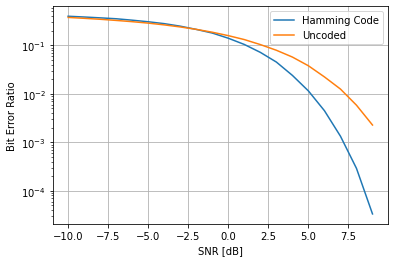

In [5]:
# MIT License
# 
# Copyright (c) 2018 Vidit Saxena
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
# 
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
# 
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.
  
import itpp

import matplotlib
#matplotlib.use("tkagg")

from matplotlib import pyplot as plt

def bit_error_ratio_uncoded_awgn(snr_db):
    '''Generate random bits'''
    nrof_bits = 3 * 100000
    source_bits = itpp.random.randb(nrof_bits)
    
    '''Modulate the bits'''
    modulator_ = itpp.comm.modulator_1d()
    constellation = itpp.vec('-1, 1')
    symbols = itpp.ivec('0, 1')
    modulator_.set(constellation, symbols)
    tx_signal = modulator_.modulate_bits(source_bits)
    
    '''Add the effect of channel to the signal'''
    noise_variance = 1.0 / (pow(10, 0.1 * snr_db))
    noise = itpp.random.randn(tx_signal.length())
    noise *= itpp.math.sqrt(noise_variance)
    rx_signal = tx_signal + noise
    
    '''Demodulate the signal'''
    demodulated_bits = modulator_.demodulate_bits(rx_signal)
    
    '''Calculate the bit error ratio'''
    return itpp.comm.BERC.count_errors(source_bits, demodulated_bits, 0, 0, 0) / nrof_bits

def bit_error_ratio_hamming_awgn(snr_db):
    '''Hamming encoder and decoder instance'''
    k = 3 # (7,4) Hamming code
    hamm = itpp.comm.Hamming_Code(k)
    
    '''Generate random bits'''
    nrof_bits = k * 100000
    source_bits = itpp.random.randb(nrof_bits)
    
    '''Encode the bits'''
    encoded_bits = hamm.encode(source_bits)
    
    '''Modulate the bits'''
    modulator_ = itpp.comm.modulator_1d()
    constellation = itpp.vec('-1, 1')
    symbols = itpp.ivec('0, 1')
    modulator_.set(constellation, symbols)
    tx_signal = modulator_.modulate_bits(encoded_bits)
    
    '''Add the effect of channel to the signal'''
    noise_variance = 1.0 / (pow(10, 0.1 * snr_db))
    noise = itpp.random.randn(tx_signal.length())
    noise *= itpp.math.sqrt(noise_variance)
    rx_signal = tx_signal + noise
    
    '''Demodulate the signal'''
    demodulated_bits = modulator_.demodulate_bits(rx_signal)
    
    '''Decode the received bits'''
    decoded_bits = hamm.decode(demodulated_bits) 
    
    '''Calculate the bit error ratio'''
    return itpp.comm.BERC.count_errors(source_bits, decoded_bits, 0, 0, 0) / nrof_bits

if __name__ == '__main__':
    '''SNR range'''
    snrs_db = range(-10, 10) 
    
    print('BER for uncoded bits over AWGN channel')
    ber_unc = [bit_error_ratio_uncoded_awgn(snr) for snr in snrs_db]
    
    print('BER for Hamming (7, 4) coded  bits over AWGN channel')
    ber = [bit_error_ratio_hamming_awgn(snr) for snr in snrs_db]
    
    plt.figure()
    plt.grid(True)
    plt.semilogy(snrs_db, ber)
    plt.semilogy(snrs_db, ber_unc)
    plt.xlabel('SNR [dB]')
    plt.ylabel('Bit Error Ratio')
    plt.legend(['Hamming Code', 'Uncoded'])
    plt.show()

BER for uncoded bits over AWGN channel
BER for Hamming (7, 4) coded  bits over AWGN channel


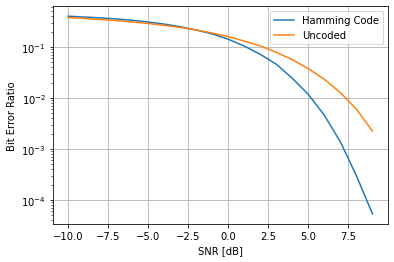

In [6]:
def bit_error_ratio_uncoded_awgn(snr_db):
    '''Generate random bits'''
    nrof_bits = 3 * 100000
    source_bits = itpp.randb(nrof_bits)
    
    '''Modulate the bits'''
    modulator = itpp.comm.BPSK()
    tx_signal = modulator.modulate_bits(source_bits)
    
    '''Add the effect of channel to the signal'''
    #noise_variance = itpp.math.inv_dB(-snr_db)
    noise_variance = 10 ** (-snr_db * 0.1)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)

    rx_signal = channel(tx_signal)
    
    '''Demodulate the signal'''
    demodulated_bits = modulator.demodulate_bits(rx_signal)
    
    '''Calculate the bit error ratio'''
    return itpp.comm.BERC.count_errors(source_bits, demodulated_bits, 0, 0, 0) / nrof_bits

def bit_error_ratio_hamming_awgn(snr_db):
    '''Hamming encoder and decoder instance'''
    k = 3 # (7,4) Hamming code
    hamm = itpp.comm.Hamming_Code(k)
    
    '''Generate random bits'''
    nrof_bits = k * 100000
    source_bits = itpp.randb(nrof_bits)
    
    '''Encode the bits'''
    encoded_bits = hamm.encode(source_bits)
    
    '''Modulate the bits'''
    modulator = itpp.comm.BPSK()
    tx_signal = modulator.modulate_bits(encoded_bits)
    
    '''Add the effect of channel to the signal'''
    #noise_variance = itpp.math.inv_dB(-snr_db)
    noise_variance = 10 ** (-snr_db * 0.1)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)

    rx_signal = channel(tx_signal)
    
    '''Demodulate the signal'''
    demodulated_bits = modulator.demodulate_bits(rx_signal)
    
    '''Decode the received bits'''
    decoded_bits = hamm.decode(demodulated_bits) 
    
    '''Calculate the bit error ratio'''
    return itpp.comm.BERC.count_errors(source_bits, decoded_bits, 0, 0, 0) / nrof_bits

'''SNR range'''
snrs_db = range(-10, 10) 

print('BER for uncoded bits over AWGN channel')
ber_unc = [bit_error_ratio_uncoded_awgn(snr) for snr in snrs_db]

print('BER for Hamming (7, 4) coded  bits over AWGN channel')
ber = [bit_error_ratio_hamming_awgn(snr) for snr in snrs_db]

plt.figure()
plt.grid(True)
plt.semilogy(snrs_db, ber)
plt.semilogy(snrs_db, ber_unc)
plt.xlabel('SNR [dB]')
plt.ylabel('Bit Error Ratio')
plt.legend(['Hamming Code', 'Uncoded'])
plt.show()

Now simulating point 1 out of 21 with EbN0_dB = -5.00
Breaking on point 1 with 1014 errors
Now simulating point 2 out of 21 with EbN0_dB = -4.50
Breaking on point 2 with 581 errors
Now simulating point 3 out of 21 with EbN0_dB = -4.00
Breaking on point 3 with 270 errors
Now simulating point 4 out of 21 with EbN0_dB = -3.50
Breaking on point 4 with 205 errors
Now simulating point 5 out of 21 with EbN0_dB = -3.00
Breaking on point 5 with 104 errors
Now simulating point 6 out of 21 with EbN0_dB = -2.50
Breaking on point 6 with 108 errors
Now simulating point 7 out of 21 with EbN0_dB = -2.00
Now simulating point 8 out of 21 with EbN0_dB = -1.50
Now simulating point 9 out of 21 with EbN0_dB = -1.00
Now simulating point 10 out of 21 with EbN0_dB = -0.50
Now simulating point 11 out of 21 with EbN0_dB = 0.00
Now simulating point 12 out of 21 with EbN0_dB = 0.50
Now simulating point 13 out of 21 with EbN0_dB = 1.00
Now simulating point 14 out of 21 with EbN0_dB = 1.50
Now simulating point 15 ou

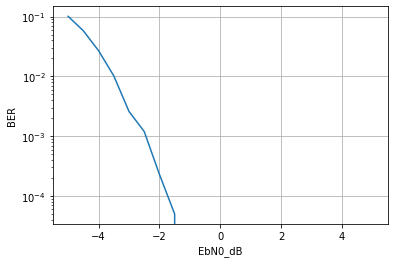

In [7]:
conv_code = itpp.comm.Convolutional_Code()

generators = itpp.ivec(3)
generators[0] = 91  # Octal 0133
generators[1] = 101 # Octal 0145
generators[2] = 125 # Octal 0175
constraint_length = 7
conv_code.set_generator_polynomials(generators, constraint_length)

# Initialize BPSK modulator
bpsk = itpp.comm.BPSK()

# Initialize an AWGN channel
channel = itpp.comm.AWGN_Channel(noisevar=0)

# Initialize bit error counter
berc = itpp.comm.BERC(indelay=0, inignorefirst=0, inignorelast=0)

EbN0_dB = itpp.vec('-5:0.5:5')
#EbN0 = itpp.math.inv_dB(EbN0_dB)

energy_per_bit = 1.0 / conv_code.get_rate()
#noise_variance = energy_per_bit * itpp.math.inv_db( EbN0_dB )

nrof_bits = 10000 # Number of bits
max_errors = 100
max_iterations = 10

ber = itpp.vec(EbN0_dB.length()) # Bit error rate
ber.clear()

# Randomize the random number generators
itpp.random.RNG_reset(42)

transmitted_symbols = itpp.vec()
for p in range(EbN0_dB.length()):
    print('Now simulating point %d out of %d with EbN0_dB = %.2f'%(p + 1, EbN0_dB.length(), EbN0_dB[p]))
    berc.clear()  # Clear the bit error rate counter.
    
    noise_variance = 10 ** (-0.1 * EbN0_dB[p])
    channel.set_noise(noise_variance / 2.0);  # Set the noise value of the AWGN channel.
    for i in range(max_iterations):
      uncoded_bits = itpp.random.randb(nrof_bits)           
      coded_bits = conv_code.encode(uncoded_bits)          
        
      bpsk.modulate_bits(coded_bits, transmitted_symbols)  
      received_symbols = channel(transmitted_symbols)      
        
      decoded_bits = conv_code.decode(received_symbols)    
      berc.count(uncoded_bits, decoded_bits)               
          
      ber[p] = berc.get_errorrate()
      
      # Break the simulation on this point if sufficient number of bit errors were observed
      if (berc.get_errors() > max_errors):
        print('Breaking on point %d with %d errors'%(p + 1, berc.get_errors()))
        break

# print(ber)
# print(EbN0_dB)
import numpy as np

EbN0_dB_np = np.array([ EbN0_dB[i] for i in range( EbN0_dB.length() ) ])
ber_np = np.array([ ber[i] for i in range( ber.length() ) ])

# Plot the results:
plt.figure()
plt.grid(True)

#plt.semilogy(EbN0_dB.to_numpy_ndarray(), ber.to_numpy_ndarray())
plt.semilogy(EbN0_dB_np, ber_np)
plt.xlabel('EbN0_dB')
plt.ylabel('BER')
plt.show()

Channel code rate: 0.3307
Now simulating point 1 out of 6 with EbN0_dB = 0.00
Breaking on point 1 with 100 block errors
Now simulating point 2 out of 6 with EbN0_dB = 1.00
Breaking on point 2 with 100 block errors
Now simulating point 3 out of 6 with EbN0_dB = 2.00
Breaking on point 3 with 100 block errors
Now simulating point 4 out of 6 with EbN0_dB = 3.00
Breaking on point 4 with 95 block errors
Now simulating point 5 out of 6 with EbN0_dB = 4.00
Breaking on point 5 with 16 block errors
Now simulating point 6 out of 6 with EbN0_dB = 5.00
[1 1 1 0.95 0.08 0]
[0 1 2 3 4 5]


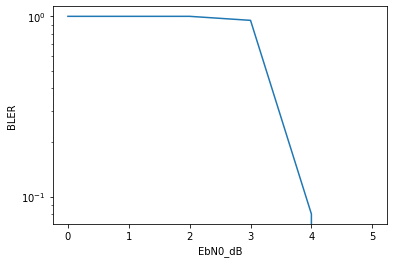

In [8]:
turbo_codec = itpp.comm.turbo_codec()

generator_sequence = itpp.ivec('11, 13')
constraint_length = 4
block_size = 512

# Set coded parameters
turbo_codec.set_parameters(generator_sequence, generator_sequence, constraint_length, itpp.ivec())

# The interleaver is generate based on a Quadrature Permutation Polynomial (QPP)
# Defined in 
f1 = 31
f2 = 64
interleaver_sequence = itpp.ivec(block_size)
for i in range(block_size):
    interleaver_sequence.set(i, (f1 * i + f2 * i * i) % block_size)

turbo_codec.set_interleaver(interleaver_sequence)

# Find out the channel code rate
dummy_bits = itpp.randb(block_size)
coded_bits = itpp.bvec()
turbo_codec.encode(dummy_bits, coded_bits)

coded_block_length = coded_bits.length()
rate = block_size / coded_block_length

print('Channel code rate: %0.4f'%(rate))

# Initialize QAM modulator
qam = itpp.comm.QAM(M=4)

# Initialize an AWGN channel
channel = itpp.comm.AWGN_Channel(noisevar=0)

# Initialize block error counter
blerc = itpp.comm.BLERC(block_size)

EbN0_dB = itpp.vec('0:1:5')

energy_per_bit = 1.0 / rate

nrof_blocks = 100 # Number of blocks in each iteration
max_iterations = 10 
max_errors = 10

bler = itpp.vec(EbN0_dB.length()) # Bit error rate
bler.clear()

# Randomize the random number generators
itpp.random.RNG_reset(42)



coded_bits = itpp.bvec()
transmitted_symbols = itpp.cvec()
for p in range(EbN0_dB.length()):
    print('Now simulating point %d out of %d with EbN0_dB = %.2f'%(p + 1, EbN0_dB.length(), EbN0_dB[p]))
    blerc.clear()  # Clear the bit error rate counter.
    
    noise_var = energy_per_bit / 10 ** (0.1 * EbN0_dB[p])
    channel.set_noise(noise_var)  # Set the noise value of the AWGN channel.
    for i in range(max_iterations):
      uncoded_bits = itpp.randb(nrof_blocks * block_size) 
      turbo_codec.encode(uncoded_bits, coded_bits)
        
      qam.modulate_bits(coded_bits, transmitted_symbols)
      received_symbols = channel(transmitted_symbols)
    
      soft_values = qam.demodulate_soft_bits(received_symbols, noise_var, itpp.comm.Soft_Method.LOGMAP)
        
      decoded_bits = itpp.bvec()
      turbo_codec.decode(soft_values, decoded_bits, itpp.bvec())
      blerc.count(uncoded_bits, decoded_bits)
          
      bler[p] = blerc.get_errorrate()
      
      # Break the simulation on this point if sufficient number of bit errors were observed
      if (blerc.get_errors() > max_errors):
        print('Breaking on point %d with %d block errors'%(p + 1, blerc.get_errors()))
        break

print(bler)
print(EbN0_dB)


import numpy as np

#Plot the results:
plt.figure()
plt.semilogy( np.array( EbN0_dB ), np.array( bler ))
plt.xlabel('EbN0_dB')
plt.ylabel('BLER')
plt.show()

BER for uncoded bits over AWGN channel
BER for Hamming (7, 4) coded  bits over AWGN channel


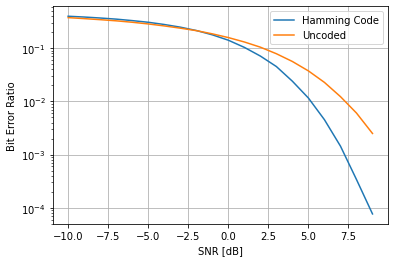

In [9]:
def bit_error_ratio_uncoded_awgn(snr_db):
    '''Generate random bits'''
    nrof_bits = 3 * 100000
    source_bits = itpp.randb(nrof_bits)
    
    '''Modulate the bits'''
    modulator = itpp.comm.BPSK()
    tx_signal = modulator.modulate_bits(source_bits)
    
    '''Add the effect of channel to the signal'''
    #noise_variance = itpp.math.inv_dB(-snr_db)
    noise_variance = 10 ** (-snr_db * 0.1)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)

    rx_signal = channel(tx_signal)
    
    '''Demodulate the signal'''
    demodulated_bits = modulator.demodulate_bits(rx_signal)
    
    '''Calculate the bit error ratio'''
    return itpp.comm.BERC.count_errors(source_bits, demodulated_bits, 0, 0, 0) / nrof_bits


def bit_error_ratio_hamming_awgn(snr_db):
    '''Hamming encoder and decoder instance'''
    k = 3 # (7,4) Hamming code
    hamm = itpp.comm.Hamming_Code(k)
    
    '''Generate random bits'''
    nrof_bits = k * 100000
    source_bits = itpp.randb(nrof_bits)
    
    '''Encode the bits'''
    encoded_bits = hamm.encode(source_bits)
    
    '''Modulate the bits'''
    modulator = itpp.comm.QPSK()
    tx_signal = modulator.modulate_bits(encoded_bits)
    
    '''Add the effect of channel to the signal'''
    #noise_variance = itpp.math.inv_dB(-snr_db)
    noise_variance = 10 ** (-snr_db * 0.1)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)

    rx_signal = channel(tx_signal)
    
    '''Demodulate the signal'''
    demodulated_bits = modulator.demodulate_bits(rx_signal)
    
    '''Decode the received bits'''
    decoded_bits = hamm.decode(demodulated_bits) 
    
    '''Calculate the bit error ratio'''
    return itpp.comm.BERC.count_errors(source_bits, decoded_bits, 0, 0, 0) / nrof_bits


'''SNR range'''
snrs_db = range(-10, 10) 

print('BER for uncoded bits over AWGN channel')
ber_unc = [bit_error_ratio_uncoded_awgn(snr) for snr in snrs_db]

print('BER for Hamming (7, 4) coded  bits over AWGN channel')
ber = [bit_error_ratio_hamming_awgn(snr) for snr in snrs_db]


plt.figure()
plt.grid(True)
plt.semilogy(snrs_db, ber)
plt.semilogy(snrs_db, ber_unc)
plt.xlabel('SNR [dB]')
plt.ylabel('Bit Error Ratio')
plt.legend(['Hamming Code', 'Uncoded'])
plt.show()

BER for uncoded bits over AWGN channel
BER for Hamming (7, 4) coded  bits over AWGN channel


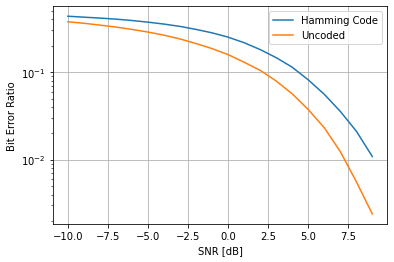

In [18]:
def bit_error_ratio_uncoded_awgn(snr_db):
    '''Generate random bits'''
    nrof_bits = 3 * 100000
    source_bits = itpp.randb(nrof_bits)
    
    '''Modulate the bits'''
    modulator = itpp.comm.BPSK()
    tx_signal = modulator.modulate_bits(source_bits)
    
    '''Add the effect of channel to the signal'''
    #noise_variance = itpp.math.inv_dB(-snr_db)
    noise_variance = 10 ** (-snr_db * 0.1)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)

    rx_signal = channel(tx_signal)
    
    '''Demodulate the signal'''
    demodulated_bits = modulator.demodulate_bits(rx_signal)
    
    '''Calculate the bit error ratio'''
    return itpp.comm.BERC.count_errors(source_bits, demodulated_bits, 0, 0, 0) / nrof_bits


def bit_error_ratio_hamming_awgn(snr_db):
    '''Hamming encoder and decoder instance'''
    k = 3 # (7,4) Hamming code
    hamm = itpp.comm.Hamming_Code(k)
    
    '''Generate random bits'''
    nrof_bits = k * 100000
    source_bits = itpp.randb(nrof_bits)
    
    '''Encode the bits'''
    encoded_bits = hamm.encode(source_bits)
    
    '''Modulate the bits'''
    modulator = itpp.comm.PSK(8)
    tx_signal = modulator.modulate_bits(encoded_bits)
    
    '''Add the effect of channel to the signal'''
    #noise_variance = itpp.math.inv_dB(-snr_db)
    noise_variance = 10 ** (-snr_db * 0.1)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)

    rx_signal = channel(tx_signal)
    
    '''Demodulate the signal'''
    demodulated_bits = modulator.demodulate_bits(rx_signal)
    
    '''Decode the received bits'''
    decoded_bits = hamm.decode(demodulated_bits) 
    
    '''Calculate the bit error ratio'''
    return itpp.comm.BERC.count_errors(source_bits, decoded_bits, 0, 0, 0) / nrof_bits


'''SNR range'''
snrs_db = range(-10, 10) 

print('BER for uncoded bits over AWGN channel')
ber_unc = [bit_error_ratio_uncoded_awgn(snr) for snr in snrs_db]

print('BER for Hamming (7, 4) coded  bits over AWGN channel')
ber = [bit_error_ratio_hamming_awgn(snr) for snr in snrs_db]


plt.figure()
plt.grid(True)
plt.semilogy(snrs_db, ber)
plt.semilogy(snrs_db, ber_unc)
plt.xlabel('SNR [dB]')
plt.ylabel('Bit Error Ratio')
plt.legend(['Hamming Code', 'Uncoded'])
plt.show()